In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/building-violations/Building_Violations.csv


In [2]:
bv=pd.read_csv("/kaggle/input/building-violations/Building_Violations.csv")
bv

,ID,VIOLATION LAST MODIFIED DATE,VIOLATION DATE,VIOLATION CODE,VIOLATION STATUS,VIOLATION STATUS DATE,VIOLATION DESCRIPTION,VIOLATION LOCATION,VIOLATION INSPECTOR COMMENTS,VIOLATION ORDINANCE,...,ADDRESS,STREET NUMBER,STREET DIRECTION,STREET NAME,STREET TYPE,PROPERTY GROUP,SSA,LATITUDE,LONGITUDE,LOCATION
0,1218020,10/17/2006,04/26/2006,BR1001,OPEN,NaN,OWNER OR LICENSED CONTRACTOR,NaN,NaN,The code violations listed below must be corre...,...,3500 N HOYNE AVE,3500,N,HOYNE,AVE,131287,NaN,41.945098,-87.681079,"(41.945098077372535, -87.68107885384137)"
1,1587577,08/22/2006,01/20/2006,CN104015,OPEN,NaN,"REPLCE WINDOW PANES, PLEXGLAS",NaN,EAST WINDOW PANES BROKEN,"Replace broken, missing or defective window pa...",...,9129 S COMMERCIAL AVE,9129,S,COMMERCIAL,AVE,475460,5.0,41.729193,-87.551088,"(41.72919293390076, -87.5510883676378)"
2,1787465,01/23/2007,12/06/2006,CN132016,COMPLIED,01/11/2007,HEAT UNIT ADEQUATELY,NaN,INADEQUATE TEMPERATURE NO HEAT IN UNIT (3F) DU...,Heat dwelling unit adequately from September 1...,...,1131 S MOZART ST,1131,S,MOZART,ST,257101,NaN,41.867352,-87.696999,"(41.86735235712279, -87.69699881056887)"
3,1787466,12/13/2006,12/11/2006,CN104015,OPEN,NaN,"REPLCE WINDOW PANES, PLEXGLAS",NaN,BROKEN WINDOW PANES: EAST ELEVATION AND BASEMENT,"Replace broken, missing or defective window pa...",...,6729 S ADA ST,6729,S,ADA,ST,397358,NaN,41.771401,-87.657781,"(41.77140078127146, -87.65778095737407)"
4,1787467,12/31/2006,12/08/2006,CN107035,OPEN,NaN,MAINTAIN EXIT SIGN ILLUMINATED,NaN,2ND FLOOR EXIT SIGN NOT WORK,Failed to maintain all exit signs illuminated ...,...,9138 S COMMERCIAL AVE,9138,S,COMMERCIAL,AVE,21461,5.0,41.728905,-87.551374,"(41.72890516933711, -87.55137391709914)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1862283,6964239,05/18/2023,05/18/2023,CN065014,OPEN,NaN,REPAIR LINTELS,EXTERIOR:E :,3RD FLOOR/LINTELS - WASHED OUT MORTAR ABOVE WI...,Failed to maintain lintel in good repair and f...,...,3051 W 59TH ST,3051,W,59TH,ST,367997,59.0,41.786183,-87.700509,"(41.786183493064534, -87.7005092720978)"
1862284,6964412,06/05/2023,06/05/2023,CN064014,OPEN,NaN,REPAIR CORNICE,EXTERIOR:E :,EAST ELEVATION - OPEN JOINTS AT CORNICES.,Failed to maintain cornice in good repair and ...,...,1342 N AVERS AVE,1342,N,AVERS,AVE,64243,NaN,41.906045,-87.722899,"(41.906044938736535, -87.72289923162816)"
1862285,6964490,06/05/2023,06/05/2023,CN041063,OPEN,NaN,CUT OR REMOVE HIGH WEEDS,OTHER : :OTHER,REAR YARD - HIGH WEEDS.,"Failed to cut or remove weeds, grass or other ...",...,7741 S YATES BLVD,7741,S,YATES,BLVD,421346,NaN,41.754145,-87.566134,"(41.754145152465675, -87.56613440067083)"
1862286,6964510,06/05/2023,03/03/2009,CN101015,OPEN,NaN,REPAIR INTERIOR WALLS/CEILING,OTHER : :OTHER,7936 S ST LAWRENCE FRONT COMMON HALLWAY BRAND ...,Failed to maintain interior walls and ceilings...,...,7932 S ST LAWRENCE AVE,7932,S,ST LAWRENCE,AVE,20950,51.0,41.750199,-87.610199,"(41.750199121853015, -87.61019853673032)"


In [3]:
missing_values = bv.isnull().any()
missing_values

ID                              False
VIOLATION LAST MODIFIED DATE    False
VIOLATION DATE                  False
VIOLATION CODE                  False
VIOLATION STATUS                False
VIOLATION STATUS DATE            True
VIOLATION DESCRIPTION            True
VIOLATION LOCATION               True
VIOLATION INSPECTOR COMMENTS     True
VIOLATION ORDINANCE              True
INSPECTOR ID                    False
INSPECTION NUMBER               False
INSPECTION STATUS                True
INSPECTION WAIVED               False
INSPECTION CATEGORY             False
DEPARTMENT BUREAU               False
ADDRESS                         False
STREET NUMBER                   False
STREET DIRECTION                False
STREET NAME                     False
STREET TYPE                      True
PROPERTY GROUP                  False
SSA                              True
LATITUDE                         True
LONGITUDE                        True
LOCATION                         True
dtype: bool

In [4]:
null_values_column = bv[['ID', 'VIOLATION LAST MODIFIED DATE', 'VIOLATION DATE', 'VIOLATION CODE',
                        'VIOLATION STATUS', 'VIOLATION STATUS DATE', 'VIOLATION DESCRIPTION',
                        'VIOLATION LOCATION', 'VIOLATION INSPECTOR COMMENTS', 'VIOLATION ORDINANCE',
                        'INSPECTOR ID', 'INSPECTION NUMBER', 'INSPECTION STATUS', 'INSPECTION WAIVED',
                        'INSPECTION CATEGORY', 'DEPARTMENT BUREAU', 'ADDRESS', 'STREET NUMBER',
                        'STREET DIRECTION', 'STREET NAME', 'STREET TYPE', 'PROPERTY GROUP', 'SSA',
                        'LATITUDE', 'LONGITUDE', 'LOCATION']].isnull().sum()

# Print the number of null values in each column
print(null_values_column)


ID                                    0
VIOLATION LAST MODIFIED DATE          0
VIOLATION DATE                        0
VIOLATION CODE                        0
VIOLATION STATUS                      0
VIOLATION STATUS DATE           1100690
VIOLATION DESCRIPTION             12864
VIOLATION LOCATION               976861
VIOLATION INSPECTOR COMMENTS     182132
VIOLATION ORDINANCE               55479
INSPECTOR ID                          0
INSPECTION NUMBER                     0
INSPECTION STATUS                    16
INSPECTION WAIVED                     0
INSPECTION CATEGORY                   0
DEPARTMENT BUREAU                     0
ADDRESS                               0
STREET NUMBER                         0
STREET DIRECTION                      0
STREET NAME                           0
STREET TYPE                       14739
PROPERTY GROUP                        0
SSA                             1502604
LATITUDE                           1772
LONGITUDE                          1772


In [5]:
# Remove rows with missing values
bv = bv.dropna(axis=0)

In [6]:
bv

,ID,VIOLATION LAST MODIFIED DATE,VIOLATION DATE,VIOLATION CODE,VIOLATION STATUS,VIOLATION STATUS DATE,VIOLATION DESCRIPTION,VIOLATION LOCATION,VIOLATION INSPECTOR COMMENTS,VIOLATION ORDINANCE,...,ADDRESS,STREET NUMBER,STREET DIRECTION,STREET NAME,STREET TYPE,PROPERTY GROUP,SSA,LATITUDE,LONGITUDE,LOCATION
516,1788976,06/12/2015,12/08/2006,CN070024,COMPLIED,06/01/2015,REPAIR PORCH SYSTEM,BL290542,"FRONT PORCH - GUARDRAILS UNDER 42""/NO JOIST HA...",Failed to repair or replace defective or missi...,...,7009 S HARPER AVE,7009,S,HARPER,AVE,394257,42.0,41.767564,-87.587783,"(41.76756445504007, -87.5877831656967)"
517,1788977,06/12/2015,12/08/2006,NC2021,COMPLIED,06/01/2015,PERMIT REQUIRED - CONTRACTOR,BL290542,PROVIDE PERMIT FOR - REAR STAIRS.,Performed or allowed work to be performed erec...,...,7009 S HARPER AVE,7009,S,HARPER,AVE,394257,42.0,41.767564,-87.587783,"(41.76756445504007, -87.5877831656967)"
519,1788979,06/12/2015,12/08/2006,CN073014,COMPLIED,06/01/2015,REPAIR EXTERIOR DOOR,BL290542,REAR DOOR - RUST THRU AT BOTTOM.,Failed to maintain exterior door in sound cond...,...,7009 S HARPER AVE,7009,S,HARPER,AVE,394257,42.0,41.767564,-87.587783,"(41.76756445504007, -87.5877831656967)"
522,1788985,06/12/2015,12/08/2006,CN194019,COMPLIED,06/01/2015,REPAIR OR REPLACE,BL290542,GUTTERS REAR RUSTED THRU AND DOWN SPOUTS 18-29...,Repair or replace,...,7009 S HARPER AVE,7009,S,HARPER,AVE,394257,42.0,41.767564,-87.587783,"(41.76756445504007, -87.5877831656967)"
528,1788987,06/12/2015,12/08/2006,CN134016,COMPLIED,06/01/2015,RATS,BL290542,RAT HOLES REAR GARAGE - FOUNDATION - WEST ELEV...,Rid premises of rodents and seal rodent holes....,...,7009 S HARPER AVE,7009,S,HARPER,AVE,394257,42.0,41.767564,-87.587783,"(41.76756445504007, -87.5877831656967)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1862209,6815493,06/05/2023,07/06/2022,CN070014,COMPLIED,06/05/2023,REPAIR EXTERIOR STAIR,EXTERIOR:S :,REAR ELEVATION ALLEY GRADE STAIRS - MISSING ...,Failed to maintain exterior stairways in safe ...,...,732 W BELDEN AVE,732,W,BELDEN,AVE,83928,35.0,41.923756,-87.647626,"(41.923755970922436, -87.6476256354759)"
1862245,6851424,06/05/2023,09/19/2022,CN104015,COMPLIED,06/05/2023,"REPLCE WINDOW PANES, PLEXGLAS",OTHER : :OTHER,"NORTH ELEVATION FIRST FLOOR, SECOND WINDOW GOI...","Replace broken, missing or defective window pa...",...,6319 N FRANCISCO AVE,6319,N,FRANCISCO,AVE,221553,43.0,41.996325,-87.701875,"(41.9963250943975, -87.70187463485564)"
1862255,6815492,06/05/2023,07/06/2022,CN062024,COMPLIED,06/05/2023,PARAPET,EXTERIOR:N :,ALL ELEVATIONS - LOOSE BRICKS AMD MORTAR . PE...,Failed to maintain parapet wall in good repair...,...,732 W BELDEN AVE,732,W,BELDEN,AVE,83928,35.0,41.923756,-87.647626,"(41.923755970922436, -87.6476256354759)"
1862269,6851422,06/05/2023,09/19/2022,CN079014,COMPLIED,06/05/2023,REPAIR/REBUILD GARAGE OR SHED,OTHER : :OTHER,REAR VEHICLE GARAGE WITH DEFECTIVE OVERHEAD VE...,Failed to maintain garage in sound condition a...,...,6319 N FRANCISCO AVE,6319,N,FRANCISCO,AVE,221553,43.0,41.996325,-87.701875,"(41.9963250943975, -87.70187463485564)"


In [7]:
bv.columns

Index(['ID', 'VIOLATION LAST MODIFIED DATE', 'VIOLATION DATE',
       'VIOLATION CODE', 'VIOLATION STATUS', 'VIOLATION STATUS DATE',
       'VIOLATION DESCRIPTION', 'VIOLATION LOCATION',
       'VIOLATION INSPECTOR COMMENTS', 'VIOLATION ORDINANCE', 'INSPECTOR ID',
       'INSPECTION NUMBER', 'INSPECTION STATUS', 'INSPECTION WAIVED',
       'INSPECTION CATEGORY', 'DEPARTMENT BUREAU', 'ADDRESS', 'STREET NUMBER',
       'STREET DIRECTION', 'STREET NAME', 'STREET TYPE', 'PROPERTY GROUP',
       'SSA', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [8]:
bv.drop(['VIOLATION DATE', 'VIOLATION ORDINANCE', 'STREET NUMBER', 'STREET DIRECTION', 'STREET NAME', 'STREET TYPE', 'INSPECTION WAIVED','VIOLATION LOCATION','SSA','VIOLATION STATUS DATE'], axis=1, inplace=True)
bv.head()

/tmp/ipykernel_20/1550445183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bv.drop(['VIOLATION DATE', 'VIOLATION ORDINANCE', 'STREET NUMBER', 'STREET DIRECTION', 'STREET NAME', 'STREET TYPE', 'INSPECTION WAIVED','VIOLATION LOCATION','SSA','VIOLATION STATUS DATE'], axis=1, inplace=True)


,ID,VIOLATION LAST MODIFIED DATE,VIOLATION CODE,VIOLATION STATUS,VIOLATION DESCRIPTION,VIOLATION INSPECTOR COMMENTS,INSPECTOR ID,INSPECTION NUMBER,INSPECTION STATUS,INSPECTION CATEGORY,DEPARTMENT BUREAU,ADDRESS,PROPERTY GROUP,LATITUDE,LONGITUDE,LOCATION
516,1788976,06/12/2015,CN070024,COMPLIED,REPAIR PORCH SYSTEM,"FRONT PORCH - GUARDRAILS UNDER 42""/NO JOIST HA...",BL00947,1614409,FAILED,COMPLAINT,CONSERVATION,7009 S HARPER AVE,394257,41.767564,-87.587783,"(41.76756445504007, -87.5877831656967)"
517,1788977,06/12/2015,NC2021,COMPLIED,PERMIT REQUIRED - CONTRACTOR,PROVIDE PERMIT FOR - REAR STAIRS.,BL00947,1614409,FAILED,COMPLAINT,CONSERVATION,7009 S HARPER AVE,394257,41.767564,-87.587783,"(41.76756445504007, -87.5877831656967)"
519,1788979,06/12/2015,CN073014,COMPLIED,REPAIR EXTERIOR DOOR,REAR DOOR - RUST THRU AT BOTTOM.,BL00947,1614409,FAILED,COMPLAINT,CONSERVATION,7009 S HARPER AVE,394257,41.767564,-87.587783,"(41.76756445504007, -87.5877831656967)"
522,1788985,06/12/2015,CN194019,COMPLIED,REPAIR OR REPLACE,GUTTERS REAR RUSTED THRU AND DOWN SPOUTS 18-29...,BL00947,1614409,FAILED,COMPLAINT,CONSERVATION,7009 S HARPER AVE,394257,41.767564,-87.587783,"(41.76756445504007, -87.5877831656967)"
528,1788987,06/12/2015,CN134016,COMPLIED,RATS,RAT HOLES REAR GARAGE - FOUNDATION - WEST ELEV...,BL00947,1614409,FAILED,COMPLAINT,CONSERVATION,7009 S HARPER AVE,394257,41.767564,-87.587783,"(41.76756445504007, -87.5877831656967)"


In [9]:
bv.columns

Index(['ID', 'VIOLATION LAST MODIFIED DATE', 'VIOLATION CODE',
       'VIOLATION STATUS', 'VIOLATION DESCRIPTION',
       'VIOLATION INSPECTOR COMMENTS', 'INSPECTOR ID', 'INSPECTION NUMBER',
       'INSPECTION STATUS', 'INSPECTION CATEGORY', 'DEPARTMENT BUREAU',
       'ADDRESS', 'PROPERTY GROUP', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [10]:
null_value= bv.isnull().any()
null_value

ID                              False
VIOLATION LAST MODIFIED DATE    False
VIOLATION CODE                  False
VIOLATION STATUS                False
VIOLATION DESCRIPTION           False
VIOLATION INSPECTOR COMMENTS    False
INSPECTOR ID                    False
INSPECTION NUMBER               False
INSPECTION STATUS               False
INSPECTION CATEGORY             False
DEPARTMENT BUREAU               False
ADDRESS                         False
PROPERTY GROUP                  False
LATITUDE                        False
LONGITUDE                       False
LOCATION                        False
dtype: bool

In [11]:
# Impute missing values in a numeric column with the mean
columns_to_fill = ['LATITUDE', 'LONGITUDE']
bv[columns_to_fill] = bv[columns_to_fill].fillna(bv[columns_to_fill].mean())
bv[columns_to_fill]

/tmp/ipykernel_20/1677423120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bv[columns_to_fill] = bv[columns_to_fill].fillna(bv[columns_to_fill].mean())


,LATITUDE,LONGITUDE
516,41.767564,-87.587783
517,41.767564,-87.587783
519,41.767564,-87.587783
522,41.767564,-87.587783
528,41.767564,-87.587783
...,...,...
1862209,41.923756,-87.647626
1862245,41.996325,-87.701875
1862255,41.923756,-87.647626
1862269,41.996325,-87.701875


In [12]:
# Display the number of rows and columns in the dataset
print("Number of rows:", bv.shape[0])
print("Number of columns:", bv.shape[1])

# Preview the first few rows of the dataset
bv.head()


Number of rows: 68297
Number of columns: 16


,ID,VIOLATION LAST MODIFIED DATE,VIOLATION CODE,VIOLATION STATUS,VIOLATION DESCRIPTION,VIOLATION INSPECTOR COMMENTS,INSPECTOR ID,INSPECTION NUMBER,INSPECTION STATUS,INSPECTION CATEGORY,DEPARTMENT BUREAU,ADDRESS,PROPERTY GROUP,LATITUDE,LONGITUDE,LOCATION
516,1788976,06/12/2015,CN070024,COMPLIED,REPAIR PORCH SYSTEM,"FRONT PORCH - GUARDRAILS UNDER 42""/NO JOIST HA...",BL00947,1614409,FAILED,COMPLAINT,CONSERVATION,7009 S HARPER AVE,394257,41.767564,-87.587783,"(41.76756445504007, -87.5877831656967)"
517,1788977,06/12/2015,NC2021,COMPLIED,PERMIT REQUIRED - CONTRACTOR,PROVIDE PERMIT FOR - REAR STAIRS.,BL00947,1614409,FAILED,COMPLAINT,CONSERVATION,7009 S HARPER AVE,394257,41.767564,-87.587783,"(41.76756445504007, -87.5877831656967)"
519,1788979,06/12/2015,CN073014,COMPLIED,REPAIR EXTERIOR DOOR,REAR DOOR - RUST THRU AT BOTTOM.,BL00947,1614409,FAILED,COMPLAINT,CONSERVATION,7009 S HARPER AVE,394257,41.767564,-87.587783,"(41.76756445504007, -87.5877831656967)"
522,1788985,06/12/2015,CN194019,COMPLIED,REPAIR OR REPLACE,GUTTERS REAR RUSTED THRU AND DOWN SPOUTS 18-29...,BL00947,1614409,FAILED,COMPLAINT,CONSERVATION,7009 S HARPER AVE,394257,41.767564,-87.587783,"(41.76756445504007, -87.5877831656967)"
528,1788987,06/12/2015,CN134016,COMPLIED,RATS,RAT HOLES REAR GARAGE - FOUNDATION - WEST ELEV...,BL00947,1614409,FAILED,COMPLAINT,CONSERVATION,7009 S HARPER AVE,394257,41.767564,-87.587783,"(41.76756445504007, -87.5877831656967)"


In [13]:
# Display summary statistics of numerical columns
bv.describe()

,ID,INSPECTION NUMBER,PROPERTY GROUP,LATITUDE,LONGITUDE
count,6.829700e+04,6.829700e+04,68297.000000,68297.000000,68297.000000
mean,4.693504e+06,9.838377e+06,168016.913495,41.844126,-87.648397
std,1.159832e+06,3.658744e+06,182163.155351,0.097752,0.049418
min,9.725150e+05,1.061448e+06,1000.000000,41.678228,-87.775131
25%,3.766505e+06,9.999915e+06,18430.000000,41.757900,-87.685884
50%,4.721318e+06,1.108391e+07,38648.000000,41.808414,-87.659734
75%,5.677677e+06,1.209574e+07,366616.000000,41.943565,-87.605559
max,6.954650e+06,1.409124e+07,681161.000000,42.022174,-87.543054


ID                              0
VIOLATION LAST MODIFIED DATE    0
VIOLATION CODE                  0
VIOLATION STATUS                0
VIOLATION DESCRIPTION           0
VIOLATION INSPECTOR COMMENTS    0
INSPECTOR ID                    0
INSPECTION NUMBER               0
INSPECTION STATUS               0
INSPECTION CATEGORY             0
DEPARTMENT BUREAU               0
ADDRESS                         0
PROPERTY GROUP                  0
LATITUDE                        0
LONGITUDE                       0
LOCATION                        0
dtype: int64


<Axes: >

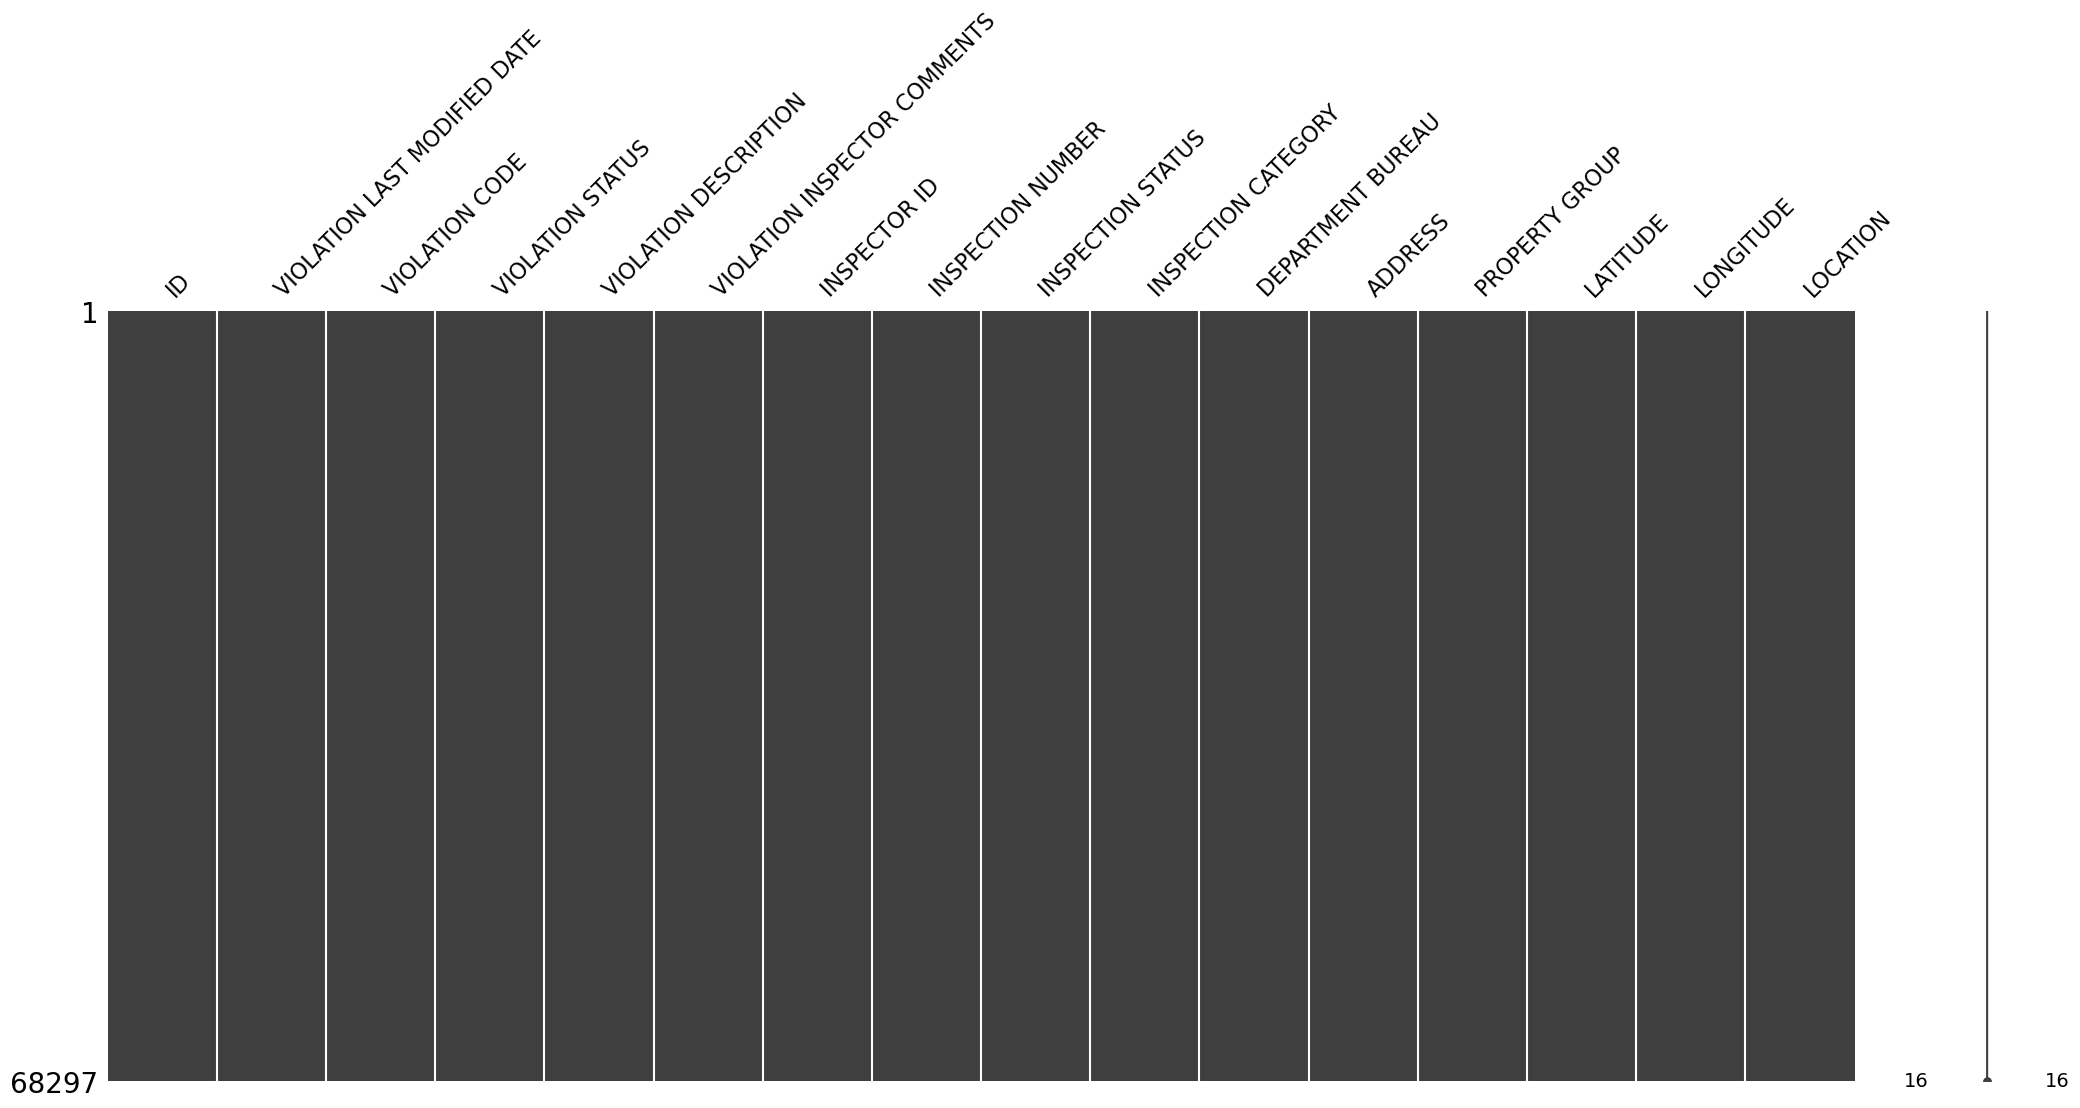

In [14]:
# Check for missing values in each column
print(bv.isnull().sum())

# Visualize missing data patterns (optional)
import missingno as msno
msno.matrix(bv)


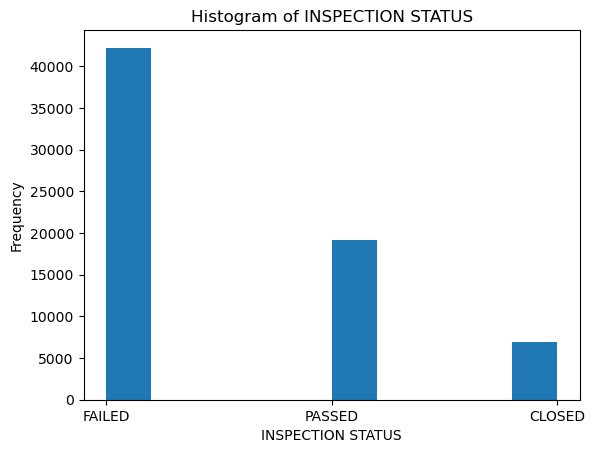

In [15]:
import matplotlib.pyplot as plt
plt.hist(bv['INSPECTION STATUS'])
plt.xlabel('INSPECTION STATUS')
plt.ylabel('Frequency')
plt.title('Histogram of INSPECTION STATUS')
plt.show()

In [16]:
import seaborn as sns


In [17]:
# Compute correlation matrix
correlation_matrix = bv.corr()
correlation_matrix



/tmp/ipykernel_20/2782288046.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = bv.corr()


,ID,INSPECTION NUMBER,PROPERTY GROUP,LATITUDE,LONGITUDE
ID,1.000000,0.759840,0.202131,-0.086781,0.033621
INSPECTION NUMBER,0.759840,1.000000,0.260272,-0.094416,0.006858
PROPERTY GROUP,0.202131,0.260272,1.000000,-0.431001,0.080353
LATITUDE,-0.086781,-0.094416,-0.431001,1.000000,-0.506488
LONGITUDE,0.033621,0.006858,0.080353,-0.506488,1.000000


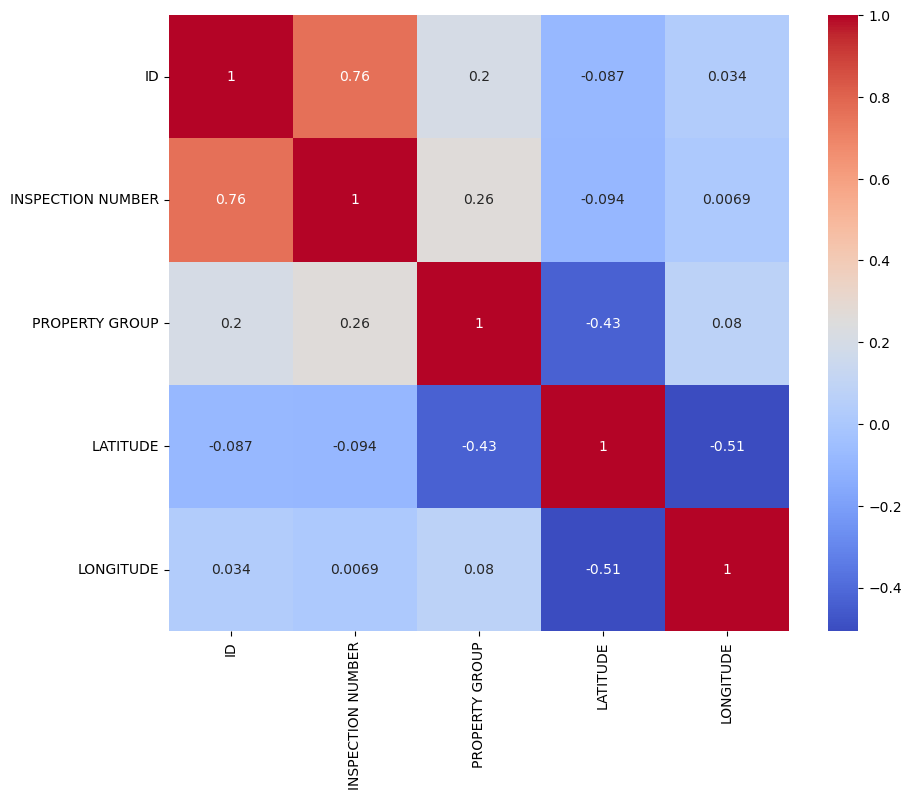

In [18]:
# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


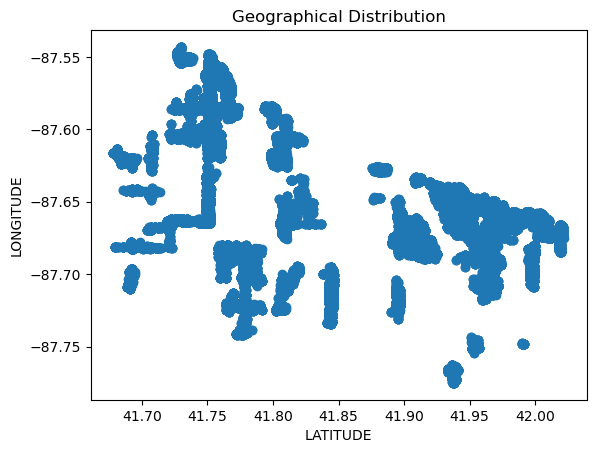

In [19]:

# Plot scatter plot of two numerical columns
plt.scatter(bv['LATITUDE'], bv['LONGITUDE'])
plt.xlabel('LATITUDE')
plt.ylabel('LONGITUDE')
plt.title('Geographical Distribution')
plt.show()

/tmp/ipykernel_20/2545857088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bv['VIOLATION CODE'] = pd.to_numeric(bv['VIOLATION CODE'], errors='coerce')


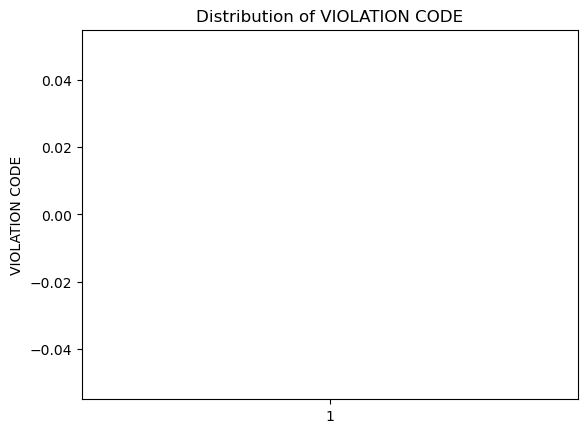

In [20]:
# Convert 'VIOLATION CODE' to numeric
bv['VIOLATION CODE'] = pd.to_numeric(bv['VIOLATION CODE'], errors='coerce')

# Box plot of the numerical column
plt.boxplot(bv['VIOLATION CODE'].dropna())  # Drop NaN values
plt.ylabel('VIOLATION CODE')
plt.title('Distribution of VIOLATION CODE')
plt.show()

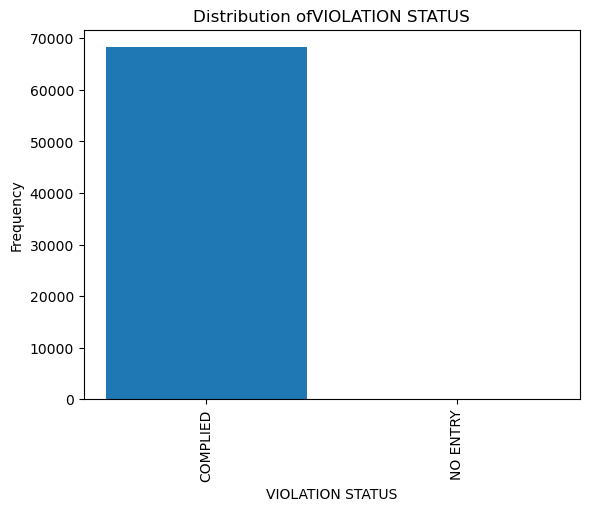

In [21]:
# Count the frequency of each violation status
status_counts = bv['VIOLATION STATUS'].value_counts()

# Create a bar plot
plt.bar(status_counts.index, status_counts.values)
plt.xlabel('VIOLATION STATUS')
plt.ylabel('Frequency')
plt.title('Distribution ofVIOLATION STATUS')
plt.xticks(rotation=90)
plt.show()

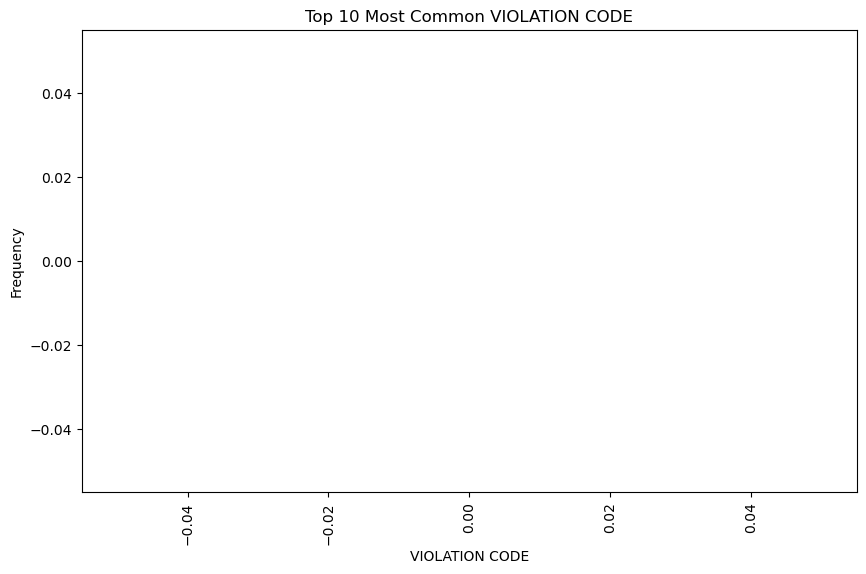

In [22]:
# Count the frequency of each violation code
code_counts = bv['VIOLATION CODE'].value_counts().head(10)  # Get the top 10 most common codes

# Create a bar plot or countplot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Option 1: Bar plot
plt.bar(code_counts.index, code_counts.values)
plt.xlabel('VIOLATION CODE')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common VIOLATION CODE')
plt.xticks(rotation=90)
plt.show()

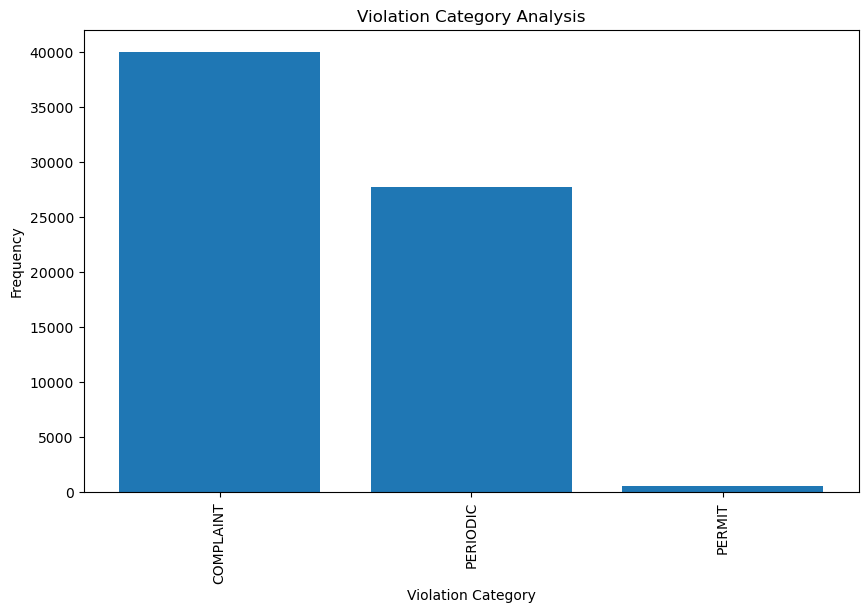

In [23]:
category_counts = bv['INSPECTION CATEGORY'].value_counts()

# Create a bar plot or countplot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

#  Bar plot
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Violation Category')
plt.ylabel('Frequency')
plt.title('Violation Category Analysis')
plt.xticks(rotation=90)
plt.show()


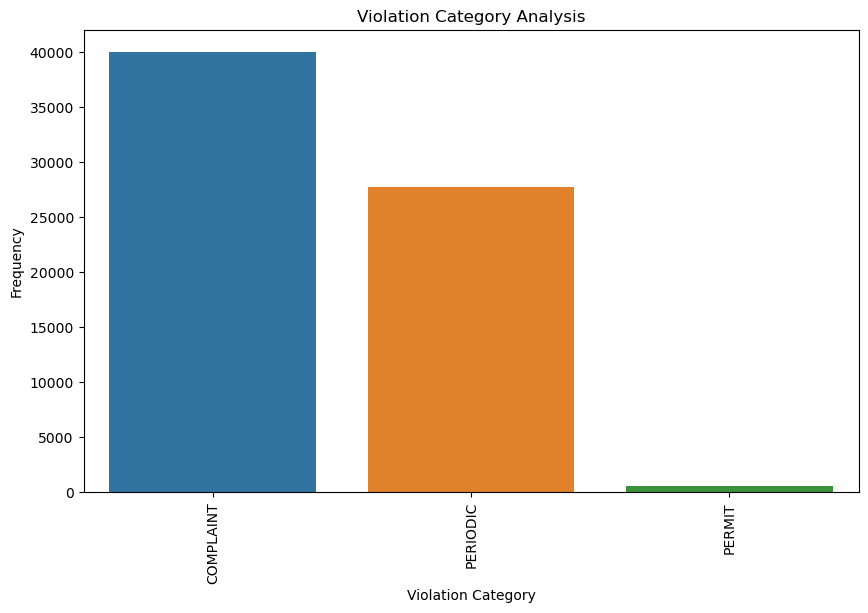

In [24]:

# Countplot using seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(data=bv, x='INSPECTION CATEGORY', order=category_counts.index)
plt.xlabel('Violation Category')
plt.ylabel('Frequency')
plt.title('Violation Category Analysis')
plt.xticks(rotation=90)
plt.show()
